# CompTaG Seminar Spring 2022 Reflection

### Eli Quist, May 2022

## INSERT TITLE HERE

### Overview

Throughout this semester, we focused on problems from the field of dimensionality reduction and in particular discussed several different techniques from the field of Manifold Learning. As a reflection, and to improve my skills in programming, I hope to implement and play around with some of the techniques we discussed.

### Principal Component Analysis

The first technique covered this semester was that of Principal Component Analysis (PCA). PCA is a very common technique for the dimensionality reduction of linear data. The general process of PCA is as follows.

1. Consider a dataset $\text{X}^{m \times n}$, with $m$ data points and dimension $n$. We wish to reduce the dimensionality from $n$ to $k \leq n$.
1. Calculate the covariance matrix $\text{S}^{m \times n}$: $$S = \frac{1}{n}\sum_{i=1}^{n} (x_i - \bar{x})(x_i - \bar{x})^{\text{T}}$$
1. We compute the Singular Value Decomposition (SVD) of the covariance matrix: $$\text{S} = \text{U}\Sigma\text{V}^{\text{T}}$$ where U is of dimension $n \times n$, $\Sigma$ is of dimension $n \times m$, and V is of dimesion $m \times m$. Importantly, we note that $\text{V} = [u_1, u_2, u_3, ..., u_m]$. For $i \in [1, m]$, we call each of these $u_i$ vectors a "principal component direction"
1. We project into a new matrix, $\text{Y}^{m \times k}$ using the $u_i$ above: $$\text{Y} = \text{P}^{\text{T}}\text{X}$$

We now will see an implemented example of this.

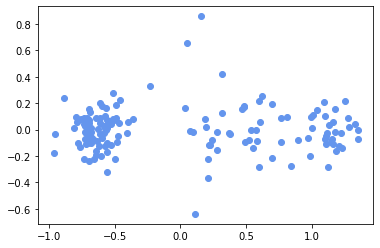

In [23]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

X = np.loadtxt("data/pcaDataClean.txt")

pca = PCA(n_components=2)
Y = pca.fit_transform(X)

_, ax = plt.subplots()
ax.scatter(Y[:,0], Y[:,1], color="cornflowerblue")


However, as explained this semester, PCA does not perform well for data that is nonlinear. Consider the following example, a swiss roll in $\text{R}^{3}$.

__TODO__: describe the data set more (2 categories), etc.

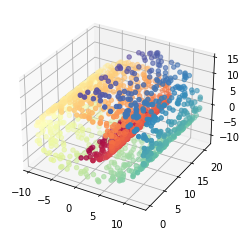

In [49]:
from util.Plotter import Plotter
from sklearn import manifold, datasets
import matplotlib.pyplot as plt

# X = np.loadtxt("data/swissroll2.txt")
X, color = datasets.make_swiss_roll(n_samples=1500)

fig = plt.figure()
ax = fig.add_subplot(projection="3d")
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.Spectral)

As the main features of the data are not linear, the principal components fail to capture the primary structure of the data. A projection into $\text{R}^2$ reveals this:

__TODO__: add colors in 2d, explain that this is still curvature, bad

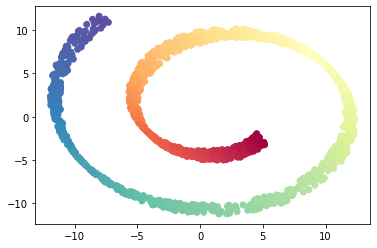

In [54]:
pca = PCA(n_components=2)
Y = pca.fit_transform(X)

fig = plt.figure()
ax = fig.add_subplot()
ax.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral)

This idea is what drives much of the motivation for Manifold Learning. How might we reduce the dimensionality of this swiss roll intuitively, based off of the nonlinear structure of the data?

### Isomap

Manifold learning starts with the assumption that our observed data lies on some low dimensional manifold [Melas-Kyriazi]. In our example, we assume the curve or roll is the lower dimensional manifold embedded in $\text{R}^3$. We can use this hypothesis along with a Manifold Learning technique to "unroll" our swiss roll.

As discussed in seminar this semester, one such technique is Isomap. Isomap was introduced in 2000, and was one of the first approaches to this problem. The Isomap algorithm consists of three main steps:

For points $p, q$, and a distance $d(p,q)$ (could be Euclidean metric, or some other metric),

1. __Find neighbors and construct a neighbor graph:__ We say $q$ is a neighbor of $p$ if, for some specified $\epsilon$, $d(p,q) < \epsilon$. Note that other slight modifications, we say $q$ is a neighbor of $p$ if it is one of the $K$ nearest neighbors of $p$. In either case, we construct a graph $G$ with edges between neighbors $p$ and $q$, where the lenght of the edge is $d(p,q)$.

1. __Compute Shortest Paths:__ Create a matrix of shortest path values $D_G$ between all pairs of points in our graph $G$ (typically, Dijkstra's algorithm is used here).

1. __Construct d-Dimensional Embedding:__ We compute the eigenvalues of $D_G$, and create a partial eigenvalue decomposition that encodes the embedding. 

[Tenenbaum et al.]

Using the same swiss roll as above, we can see the result: a lower dimensional embedding maintaining geodesic distances. Note that ScikitLearn's implementation uses the $K$ nearest neighbors approach for constructing the neighbor graph.

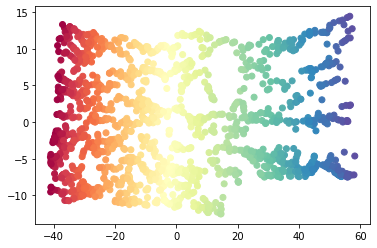

In [55]:
from sklearn.manifold import Isomap

embedding = Isomap(n_neighbors = 5, n_components=2)
X_transformed = embedding.fit_transform(X[:,0:3])

fig = plt.figure()
ax = fig.add_subplot()
ax.scatter(X_transformed[:, 0], X_transformed[:, 1], c=color, cmap=plt.cm.Spectral)

### References

@article{scikit-learn,
 title={Scikit-learn: Machine Learning in {P}ython},
 author={Pedregosa, F. and Varoquaux, G. and Gramfort, A. and Michel, V.
         and Thirion, B. and Grisel, O. and Blondel, M. and Prettenhofer, P.
         and Weiss, R. and Dubourg, V. and Vanderplas, J. and Passos, A. and
         Cournapeau, D. and Brucher, M. and Perrot, M. and Duchesnay, E.},
 journal={Journal of Machine Learning Research},
 volume={12},
 pages={2825--2830},
 year={2011}
}


- Swiss roll dataset
- PCA presentation references
- https://www.science.org/doi/full/10.1126/science.290.5500.2319?cookieSet=1
- https://arxiv.org/abs/2011.01307#:~:text=Manifold%20learning%20is%20a%20popular,in%20a%20higher%2Ddimensional%20space.

https://scikit-learn.org/stable/auto_examples/manifold/plot_swissroll.html